In [1]:
import numpy as np

# Getting Matrix Values
mCSV = np.genfromtxt("33-data-third-order.csv", skip_header=1, delimiter=",", dtype=float)
mCSVt = np.transpose(mCSV)

# Set the floatmode to 'fixed'
np.set_printoptions(floatmode='fixed')

# Display the transposed CSV data
print(mCSVt.astype(int))

[[   0    1    2    3    4    5    6    7    8    9   10   11   12]
 [   5   14   41   98  197  350  569  866 1253 1742 2345 3074 3941]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Setup numpy
np.set_printoptions(
  precision=2,
  formatter={
    'int':   '{:30,d}'.format,
    'float': '{:10,.8f}'.format
  },
  linewidth=np.inf,
  suppress=True)

In [4]:
# Getting Matrix Values
mCSV = np.genfromtxt("33-data-third-order.csv",
  skip_header=1, delimiter=",", dtype=float)

mCSVt   = np.transpose(mCSV)
x_values = mx = mCSVt[0]
y_values = mB = mCSVt[1]

In [5]:
# Initial Matrix Value
order = 3

In [6]:
# Perform cubic regression using polyfit
mC = np.polyfit(x_values, y_values, deg=order)
print('Using polyfit')
print(f'Coefficients (a, b, c, d):\n\t{np.flip(mC)}\n')

Using polyfit
Coefficients (a, b, c, d):
	[5.00000000 4.00000000 3.00000000 2.00000000]



In [8]:
# Calculated Matrix Variable
mA    = np.flip(np.vander(mx, order+1), axis=1)
mAt   = np.transpose(mA)
mAt_A = mAt @ mA
mAt_B = mAt @ mB
mC    = np.linalg.solve(mAt_A, mAt_B)

[a, b, c, d] = mC
print('Calculate manually')
print(f'Coefficients (a, b, c, d):\n\t{mC}\n')

Calculate manually
Coefficients (a, b, c, d):
	[5.00000000 4.00000000 3.00000000 2.00000000]



Text(0.5, -0.01, 'a = 5.00, b = 4.00, c = 3.00, d = 2.00')

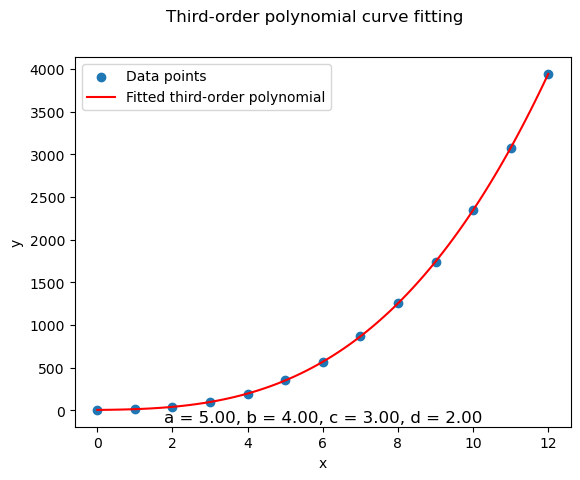

In [9]:
# Draw Plot
x_plot = np.linspace(min(mx), max(mx), 100)
y_plot = a + b * x_plot + \
         c * x_plot**2 + d * x_plot**3

plt.scatter(mx, mB, label='Data points')
plt.plot(x_plot, y_plot, color='red',
  label='Fitted third-order polynomial')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.suptitle(
  'Third-order polynomial curve fitting')

subfmt = "a = %.2f, b = %.2f, c = %.2f, d = %.2f"
plt.title(subfmt % (a, b, c, d), y=-0.01)